# Forecasting Stock with Linear Regression

In [1]:
import numpy as np
import pandas as pd
import quandl
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Import and make the date column the index
#df = pd.read_csv('Google_Stock.csv', index_col = 'Date') # ...If you didn't get quandl to work I provided you with an old google stock csv
df = quandl.get("WIKI/AMZN",authtoken='mvkxPwoq-SieQszyBUSg')

In [3]:
# Create a datetime index if it isn't already
#df.index = pd.to_datetime(df.index)
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


Let's create a 'Label' column which will contain the values which we are trying to predict. We will use the **.shift()** method to shift the values in the 'Adj. Close' column the number of spaces specified in the 'forecast_out' variable.

The image below showa an example of how the **.shift()** method works:

![](shift_example.png)

Lots of data, we'll focus on just the adjusted close to make the forecast since linear regression only uses one predictor variable. 

In [4]:
# predicting 65 days into the future (~1 quarter)
forecast_out = 65

# Shift 'forecast' up the amout of forecast_out in order to predict that many days into the future
##i.e. in row with day X, df[future] will be the adjusted close of the forecast_out days into the future that we want to predict
df['Future'] = df['Adj. Close'].shift(-forecast_out)

#df.head()

Next we will remove the rows where the the 'Future' column was made NaN by the .shift() method and save them to forecast with later.

In [5]:
#Save original data frame, without label
X = df.drop(['Future'], 1) 

# Save the most recent 'forecast_out' days to forecast with later
X_forecast = X[-forecast_out:]

# Remove the most recent 'forecast_out' days where we don't have labels
X = X[:-forecast_out]

# labels y which we know the value of the adjusted close
y = df['Future'][:-forecast_out]

Here we will partition up the training and testing sets as well as fit our model.

In [6]:
# partitioning up the training/testing data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

As you'll see above, we split the data into training and testing. This is something that you will do a lot with in Machine Learning that is likely different from the typical regression you have learned before. Basically, we randomly split that data up so that only some data is used to build the regression line. Why?
* We can evaluate the performance of a model on data it has not seen before

In [7]:
# regressor
regr = LinearRegression()

# Train the regressor
regr.fit(X_train, y_train) #least squares

# Calculate the accuracy of the model (squared error in this case)
accuracy = regr.score(X_test, y_test)

accuracy

0.97549466470795521

### Make a plot of the model's forecast

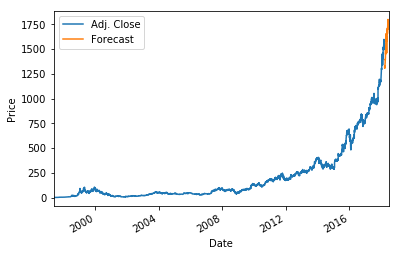

In [28]:
from pandas.tseries.offsets import BDay # This will allow us to get the next business day
import matplotlib.pyplot as plt

# Predict on X_forecast to make the forecasted predictions
forecast_set = regr.predict(X_forecast)

# The first buisness day after the last day in the dataset
first_forecast_day = df.index[-1] + BDay()

# Fill in the rest of the days for the forecast index
forecast_index = [first_forecast_day]
for i in range(1, forecast_out):
    forecast_index.append(forecast_index[i-1]+BDay())

# Combine the forecast index with the forecast values
forecast = pd.Series(forecast_set, index = forecast_index)

# plot
df['Adj. Close'].plot()
forecast.plot()
plt.legend(['Adj. Close', 'Forecast'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Should we take this regression and start investing?